# IMPORT PACKAGES & READ DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Show all ROWS in the output:
pd.set_option('display.max_rows', None)

# Show all COLUMNS in the output:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('df_cleaned_p2.csv')

In [5]:
with open("all_feature_lists_v2", "rb") as fp:
    id_features, \
    cont_features, \
    cat_features, \
    global_flavor_features, \
    f_columns_g, \
    n_columns_g, \
    t_columns_g, \
    complexity_features, \
    missing_features_CAT, \
    missing_features_CONT, \
    missing_features_ALL = pickle.load(fp)


In [6]:
df.head()

,Unnamed: 0,product_title,distillery,country,region,age,abv,bottle_size,bottler,maturing,rating,nbr_of_ratings,unique_id,filtration,colouring,whisky_type,f_Spices_g,f_Sweet_g,f_Malt_g,f_Pepper_g,f_Oak_g,f_Black Currant_g,f_Fruit_g,f_Ginger_g,f_Caramel_g,f_Honey_g,f_Nuts_g,f_Oil_g,f_Zitrus_g,f_Herb_g,f_Dark Chocolate_g,f_Coffee_g,f_Grape_g,f_Chocolate_g,f_Peat Smoke_g,f_Vanilla_g,f_Orange_g,f_Sherry_g,f_Cake_g,f_Floral_g,f_Raisin_g,f_Herbs_g,f_Wheat_g,f_Chili_g,f_Salt_g,f_Tobacco_g,f_Maritime Notes_g,f_Bonfire Smoke_g,f_Alcohol_g,f_Berries_g,f_Strawberry_g,f_Apple_g,f_Blackberry_g,f_Cinnamon_g,f_Kiwi_g,f_Plum_g,f_Ham_g,f_Hazelnut_g,f_Seaweed_g,f_Lemon_g,f_Lemon Peel_g,f_Walnut_g,f_Iodine_g,f_Dried Fruit_g,f_Pear_g,f_Cherry_g,f_Date_g,f_Almonds_g,f_Heather_g,f_Leather_g,f_Banana_g,f_Clove_g,f_Medicinal Smoke_g,f_Barley_g,f_Grass_g,f_Lime_g,f_Nutmeg_g,f_Tropical Fruit_g,f_Peach_g,f_Mint_g,f_Fig_g,f_Grapefruit_g,f_Red Currant_g,f_Pineapple_g,f_Anis_g,f_Green Apple_g,f_Coconut_g,f_Hay_g,f_Rye_g,f_Melon_g,n_Sweet_g,n_Fruit_g,n_Green Apple_g,n_Pear_g,n_Zitrus_g,n_Honey_g,n_Herbs_g,n_Floral_g,n_Vanilla_g,n_Salt_g,n_Apple_g,n_Spices_g,n_Malt_g,n_Oak_g,n_Maritime Notes_g,n_Sherry_g,n_Caramel_g,n_Dried Fruit_g,n_Leather_g,n_Lemon_g,n_Orange_g,n_Herb_g,n_Cherry_g,n_Fig_g,n_Raisin_g,n_Seaweed_g,n_Cinnamon_g,n_Plum_g,n_Peat Smoke_g,n_Bonfire Smoke_g,n_Tobacco_g,n_Barley_g,n_Wheat_g,n_Chocolate_g,n_Chili_g,n_Coffee_g,n_Grass_g,n_Berries_g,n_Oil_g,n_Nuts_g,n_Heather_g,n_Ham_g,n_Iodine_g,n_Pineapple_g,n_Strawberry_g,n_Grape_g,n_Red Currant_g,n_Nutmeg_g,n_Peach_g,n_Alcohol_g,n_Lime_g,n_Walnut_g,n_Blackberry_g,n_Ginger_g,n_Dark Chocolate_g,n_Date_g,n_Cake_g,n_Clove_g,n_Pepper_g,n_Tropical Fruit_g,n_Banana_g,n_Coconut_g,n_Hazelnut_g,n_Lemon Peel_g,n_Melon_g,n_Black Currant_g,n_Almonds_g,n_Mint_g,n_Anis_g,n_Hay_g,n_Medicinal Smoke_g,n_Grapefruit_g,n_Rye_g,n_Kiwi_g,t_Fruit_g,t_Sweet_g,t_Pear_g,t_Vanilla_g,t_Green Apple_g,t_Caramel_g,t_Spices_g,t_Pepper_g,t_Malt_g,t_Oak_g,t_Zitrus_g,t_Honey_g,t_Lemon_g,t_Herb_g,t_Coffee_g,t_Orange_g,t_Chocolate_g,t_Sherry_g,t_Alcohol_g,t_Dried Fruit_g,t_Grape_g,t_Peat Smoke_g,t_Raisin_g,t_Nuts_g,t_Oil_g,t_Salt_g,t_Maritime Notes_g,t_Peach_g,t_Bonfire Smoke_g,t_Plum_g,t_Chili_g,t_Nutmeg_g,t_Cherry_g,t_Dark Chocolate_g,t_Leather_g,t_Almonds_g,t_Berries_g,t_Barley_g,t_Herbs_g,t_Tobacco_g,t_Heather_g,t_Ham_g,t_Walnut_g,t_Grass_g,t_Floral_g,t_Black Currant_g,t_Blackberry_g,t_Tropical Fruit_g,t_Date_g,t_Cake_g,t_Cinnamon_g,t_Apple_g,t_Seaweed_g,t_Grapefruit_g,t_Medicinal Smoke_g,t_Lemon Peel_g,t_Ginger_g,t_Fig_g,t_Hazelnut_g,t_Banana_g,t_Clove_g,t_Melon_g,t_Mint_g,t_Red Currant_g,t_Hay_g,t_Lime_g,t_Wheat_g,t_Iodine_g,t_Pineapple_g,t_Rye_g,t_Anis_g,t_Strawberry_g,t_Coconut_g,t_Kiwi_g,missing_colouring,missing_filtration,missing_country,missing_region,missing_distillery,missing_bottler,missing_maturing,missing_age,missing_rating,country_CAT,region_CAT,bottler_CAT,distillery_CAT,maturing_CAT,abv_CAT,nbr_of_ratings_CAT,finish_complexity,nosing_complexity,tasting_complexity
0,0,Glen Moray Elgin Classic,Glen Moray,Scotland,Speyside,NaN,40.0,0.7,Original bottling,NaN,3.4,24,1_Glen Moray Elgin Classic,Filtration,Colouring,Single Malt,0.5059,2.3293,2.0943,1.7707,0.2346,0.5536,0.2529,0.2647,0.2618,0.2677,0.2618,0.2647,0.2677,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1491,1.9301,2.6776,2.2912,2.1421,2.0347,0.6246,0.7855,0.3869,0.2677,0.2647,0.2115,0.2387,0.1977,0.1930,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8935,2.0512,2.0943,1.6900,2.1421,1.3931,0.7064,0

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

,product_title,distillery,country,region,age,abv,bottle_size,bottler,maturing,rating,nbr_of_ratings,unique_id,filtration,colouring,whisky_type,f_Spices_g,f_Sweet_g,f_Malt_g,f_Pepper_g,f_Oak_g,f_Black Currant_g,f_Fruit_g,f_Ginger_g,f_Caramel_g,f_Honey_g,f_Nuts_g,f_Oil_g,f_Zitrus_g,f_Herb_g,f_Dark Chocolate_g,f_Coffee_g,f_Grape_g,f_Chocolate_g,f_Peat Smoke_g,f_Vanilla_g,f_Orange_g,f_Sherry_g,f_Cake_g,f_Floral_g,f_Raisin_g,f_Herbs_g,f_Wheat_g,f_Chili_g,f_Salt_g,f_Tobacco_g,f_Maritime Notes_g,f_Bonfire Smoke_g,f_Alcohol_g,f_Berries_g,f_Strawberry_g,f_Apple_g,f_Blackberry_g,f_Cinnamon_g,f_Kiwi_g,f_Plum_g,f_Ham_g,f_Hazelnut_g,f_Seaweed_g,f_Lemon_g,f_Lemon Peel_g,f_Walnut_g,f_Iodine_g,f_Dried Fruit_g,f_Pear_g,f_Cherry_g,f_Date_g,f_Almonds_g,f_Heather_g,f_Leather_g,f_Banana_g,f_Clove_g,f_Medicinal Smoke_g,f_Barley_g,f_Grass_g,f_Lime_g,f_Nutmeg_g,f_Tropical Fruit_g,f_Peach_g,f_Mint_g,f_Fig_g,f_Grapefruit_g,f_Red Currant_g,f_Pineapple_g,f_Anis_g,f_Green Apple_g,f_Coconut_g,f_Hay_g,f_Rye_g,f_Melon_g,n_Sweet_g,n_Fruit_g,n_Green Apple_g,n_Pear_g,n_Zitrus_g,n_Honey_g,n_Herbs_g,n_Floral_g,n_Vanilla_g,n_Salt_g,n_Apple_g,n_Spices_g,n_Malt_g,n_Oak_g,n_Maritime Notes_g,n_Sherry_g,n_Caramel_g,n_Dried Fruit_g,n_Leather_g,n_Lemon_g,n_Orange_g,n_Herb_g,n_Cherry_g,n_Fig_g,n_Raisin_g,n_Seaweed_g,n_Cinnamon_g,n_Plum_g,n_Peat Smoke_g,n_Bonfire Smoke_g,n_Tobacco_g,n_Barley_g,n_Wheat_g,n_Chocolate_g,n_Chili_g,n_Coffee_g,n_Grass_g,n_Berries_g,n_Oil_g,n_Nuts_g,n_Heather_g,n_Ham_g,n_Iodine_g,n_Pineapple_g,n_Strawberry_g,n_Grape_g,n_Red Currant_g,n_Nutmeg_g,n_Peach_g,n_Alcohol_g,n_Lime_g,n_Walnut_g,n_Blackberry_g,n_Ginger_g,n_Dark Chocolate_g,n_Date_g,n_Cake_g,n_Clove_g,n_Pepper_g,n_Tropical Fruit_g,n_Banana_g,n_Coconut_g,n_Hazelnut_g,n_Lemon Peel_g,n_Melon_g,n_Black Currant_g,n_Almonds_g,n_Mint_g,n_Anis_g,n_Hay_g,n_Medicinal Smoke_g,n_Grapefruit_g,n_Rye_g,n_Kiwi_g,t_Fruit_g,t_Sweet_g,t_Pear_g,t_Vanilla_g,t_Green Apple_g,t_Caramel_g,t_Spices_g,t_Pepper_g,t_Malt_g,t_Oak_g,t_Zitrus_g,t_Honey_g,t_Lemon_g,t_Herb_g,t_Coffee_g,t_Orange_g,t_Chocolate_g,t_Sherry_g,t_Alcohol_g,t_Dried Fruit_g,t_Grape_g,t_Peat Smoke_g,t_Raisin_g,t_Nuts_g,t_Oil_g,t_Salt_g,t_Maritime Notes_g,t_Peach_g,t_Bonfire Smoke_g,t_Plum_g,t_Chili_g,t_Nutmeg_g,t_Cherry_g,t_Dark Chocolate_g,t_Leather_g,t_Almonds_g,t_Berries_g,t_Barley_g,t_Herbs_g,t_Tobacco_g,t_Heather_g,t_Ham_g,t_Walnut_g,t_Grass_g,t_Floral_g,t_Black Currant_g,t_Blackberry_g,t_Tropical Fruit_g,t_Date_g,t_Cake_g,t_Cinnamon_g,t_Apple_g,t_Seaweed_g,t_Grapefruit_g,t_Medicinal Smoke_g,t_Lemon Peel_g,t_Ginger_g,t_Fig_g,t_Hazelnut_g,t_Banana_g,t_Clove_g,t_Melon_g,t_Mint_g,t_Red Currant_g,t_Hay_g,t_Lime_g,t_Wheat_g,t_Iodine_g,t_Pineapple_g,t_Rye_g,t_Anis_g,t_Strawberry_g,t_Coconut_g,t_Kiwi_g,missing_colouring,missing_filtration,missing_country,missing_region,missing_distillery,missing_bottler,missing_maturing,missing_age,missing_rating,country_CAT,region_CAT,bottler_CAT,distillery_CAT,maturing_CAT,abv_CAT,nbr_of_ratings_CAT,finish_complexity,nosing_complexity,tasting_complexity
0,Glen Moray Elgin Classic,Glen Moray,Scotland,Speyside,NaN,40.0,0.7,Original bottling,NaN,3.4,24,1_Glen Moray Elgin Classic,Filtration,Colouring,Single Malt,0.5059,2.3293,2.0943,1.7707,0.2346,0.5536,0.2529,0.2647,0.2618,0.2677,0.2618,0.2647,0.2677,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1491,1.9301,2.6776,2.2912,2.1421,2.0347,0.6246,0.7855,0.3869,0.2677,0.2647,0.2115,0.2387,0.1977,0.1930,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8935,2.0512,2.0943,1.6900,2.1421,1.3931,0.7064,0.759,0.6131,0

In [9]:
len(df)

6559

In [10]:
df = df.reset_index(drop=True)

# LISTS

In [11]:
rarity_features = [
    'nosing_rare', 'nosing_uncommon', 'nosing_common',
    'tasting_rare', 'tasting_uncommon', 'tasting_common',
    'finish_rare', 'finish_uncommon', 'finish_common'
    ]

In [12]:
cont_features

['age',
 'rating',
 'abv',
 'nbr_of_ratings',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity']

In [13]:
cont_to_remove = ['abv','nbr_of_ratings']

cont_features_CLUST = [x for x in cont_features if x not in cont_to_remove]
cont_features_CLUST

['age',
 'rating',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity']

In [14]:
cont_to_remove_PIPE = ['abv', 'nbr_of_ratings', 'rating']
cont_features_PIPE = [x for x in cont_features if x not in cont_to_remove_PIPE]

In [15]:
cat_features

['country',
 'region',
 'distillery',
 'bottler',
 'filtration',
 'colouring',
 'maturing',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT',
 'country_CAT',
 'region_CAT',
 'bottler_CAT',
 'distillery_CAT',
 'maturing_CAT']

In [16]:
cat_to_remove = ['country','region','distillery', 'bottler', 'maturing']

cat_features_CLUST = [x for x in cat_features if x not in cat_to_remove]
cat_features_CLUST

['filtration',
 'colouring',
 'whisky_type',
 'abv_CAT',
 'nbr_of_ratings_CAT',
 'country_CAT',
 'region_CAT',
 'bottler_CAT',
 'distillery_CAT',
 'maturing_CAT']

In [17]:
missing_features_ALL = missing_features_CONT + missing_features_CAT
missing_features_ALL

['missing_age',
 'missing_rating',
 'missing_colouring',
 'missing_filtration',
 'missing_country',
 'missing_region',
 'missing_distillery',
 'missing_bottler',
 'missing_maturing']

In [18]:
flavor_ratings_ALL = n_columns_g + t_columns_g + f_columns_g

In [19]:
# FEATURES TO USE:

## CONT:
# cont_features_CLUST
# flavor_ratings_ALL
# missing_features_ALL

## CAT:
# cat_features_CLUST

In [20]:
all_cont_features_CLUST = cont_features_CLUST + flavor_ratings_ALL + missing_features_ALL
all_cont_features_CLUST

['age',
 'rating',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity',
 'n_Sweet_g',
 'n_Fruit_g',
 'n_Green Apple_g',
 'n_Pear_g',
 'n_Zitrus_g',
 'n_Honey_g',
 'n_Herbs_g',
 'n_Floral_g',
 'n_Vanilla_g',
 'n_Salt_g',
 'n_Apple_g',
 'n_Spices_g',
 'n_Malt_g',
 'n_Oak_g',
 'n_Maritime Notes_g',
 'n_Sherry_g',
 'n_Caramel_g',
 'n_Dried Fruit_g',
 'n_Leather_g',
 'n_Lemon_g',
 'n_Orange_g',
 'n_Herb_g',
 'n_Cherry_g',
 'n_Fig_g',
 'n_Raisin_g',
 'n_Seaweed_g',
 'n_Cinnamon_g',
 'n_Plum_g',
 'n_Peat Smoke_g',
 'n_Bonfire Smoke_g',
 'n_Tobacco_g',
 'n_Barley_g',
 'n_Wheat_g',
 'n_Chocolate_g',
 'n_Chili_g',
 'n_Coffee_g',
 'n_Grass_g',
 'n_Berries_g',
 'n_Oil_g',
 'n_Nuts_g',
 'n_Heather_g',
 'n_Ham_g',
 'n_Iodine_g',
 'n_Pineapple_g',
 'n_Strawberry_g',
 'n_Grape_g',
 'n_Red Currant_g',
 'n_Nutmeg_g',
 'n_Peach_g',
 'n_Alcohol_g',
 'n_Lime_g',
 'n_Walnut_g',
 'n_Blackberry_g',
 'n_Ginger_g',
 'n_Dark Chocolate_g',
 'n_Date_g',
 'n_Cake_g',
 'n_Clove_g',
 'n_

In [21]:
all_cont_features_PIPE = cont_features_CLUST + flavor_ratings_ALL + missing_features_ALL
del(all_cont_features_PIPE[1])

In [22]:
len(all_cont_features_PIPE)

236

# PREPARE DATA & GENERAL PIPELINE

In [128]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

## Data

In [24]:
dataset_for_pipe = df[all_cont_features_CLUST+cat_features_CLUST].dropna(subset='rating')

In [25]:
X = dataset_for_pipe.drop('rating',axis=1)
y = dataset_for_pipe['rating']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Pipeline

### Create transformers

In [345]:
class RarityTransformer(BaseEstimator, TransformerMixin):
        
    def __init__(self, countperc_finish=None, countperc_nosing=None, countperc_tasting=None):
        self.countperc_finish = countperc_finish
        self.countperc_nosing = countperc_nosing
        self.countperc_tasting = countperc_tasting

    def fit(self, X, y=None):
        self.countperc_finish = [round(len(X[X[i] > 0])/len(X)*100,1) for i in f_columns_g]
        self.countperc_nosing = [round(len(X[X[i] > 0])/len(X)*100,1) for i in n_columns_g]
        self.countperc_tasting = [round(len(X[X[i] > 0])/len(X)*100,1) for i in t_columns_g]
        return self

    def transform(self, X, y=None):
        
        X = pd.DataFrame(data=X,columns=X.columns)
        
        profile_columns_count = [
            ('finish',f_columns_g,self.countperc_finish),
            ('nosing',n_columns_g,self.countperc_nosing),
            ('tasting',t_columns_g,self.countperc_tasting)
        ]
        
        for profile,columns,countperc in profile_columns_count:
            rarity_df = pd.DataFrame()
            rarity_df['feature'] = columns
            rarity_df['count_%'] = countperc
            
            conditions = [
                (rarity_df['count_%'] < 10 ),
                (rarity_df['count_%'] >= 10) & (rarity_df['count_%'] < 50),
                (rarity_df['count_%'] >= 50) 
            ]

            values = ['rare','uncommon','common']
            
            rarity_df[f'{profile}_rarity'] = np.select(conditions,values)
            
            rare = list(rarity_df[rarity_df[f'{profile}_rarity']=='rare']['feature'])
            uncommon = list(rarity_df[rarity_df[f'{profile}_rarity']=='uncommon']['feature'])
            common = list(rarity_df[rarity_df[f'{profile}_rarity']=='common']['feature'])
            
            X[f'{profile}_rare'] = X[rare].apply(lambda x: sum(x>0), axis=1)
            X[f'{profile}_uncommon'] = X[uncommon].apply(lambda x: sum(x>0), axis=1)
            X[f'{profile}_common'] = X[common].apply(lambda x: sum(x>0), axis=1)
                
        return X
    
    def fit_transform(self, X, y=None, **fit_params):
        # Fit and transform logic here
        self.fit(X, y, **fit_params)
        return self.transform(X)

### Create general Pipeline

In [346]:
rarity_features_pipe = Pipeline(steps=[
    ('rarity_features', RarityTransformer())
])

new_columns = [
    'finish_rare', 'finish_uncommon', 'finish_common',
    'nosing_rare', 'nosing_uncommon', 'nosing_common', 
    'tasting_rare', 'tasting_uncommon', 'tasting_common'
    ]

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
])

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

cont_cat_pipe = ColumnTransformer([
    ('num', num_pipe, all_cont_features_PIPE + new_columns),
    # ('pca', PCA(), flavor_ratings_ALL),
    ('cat', cat_pipe, cat_features_CLUST)
])

preprocessor = Pipeline(steps=[
    ('rarity', rarity_features_pipe),
    ('cont & cat', cont_cat_pipe)
])

In [29]:
# Test whether the preprocessor generates the extra columns
# and passes them throught to the other pipeline steps
# The number of columns should be 246 - 10 + 73 + 9 = 318
# trial = preprocessor.fit_transform(X_test)
# trial.shape

# ANALYSIS

## XG Boost

In [347]:
full_pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb',XGBRegressor()),
])

In [352]:
param_grid_xgb_light = {
    'xgb__learning_rate': [0.2],  # Learning rate (shrinkage parameter)
    'xgb__n_estimators': [200],  # Number of trees in the forest
    'xgb__max_depth': [10],  # Maximum depth of the trees
    'xgb__min_child_weight': [5],  # Minimum sum of instance weight (hessian) needed in a child
    'xgb__colsample_bytree': [1.0],  # Subsample ratio of columns when constructing each tree
    'xgb__reg_alpha': [0.5],  # L1 regularization term on weights
    'xgb__reg_lambda': [0.1],  # L2 regularization term on weights
}

param_grid_xgb = {
    # 'cont & cat__pca__n_components':            [ 5, 15, 30 ],
    'xgb__learning_rate':                       [ 0.1, 0.3 ],
    'xgb__max_depth':                           [ 1, 3, 5, 10 ],
    'xgb__min_child_weight':                    [ 1, 3, 5, 10 ],
    # 'xgb__learning_rate':                       [ 0.3 ],
    # 'xgb__max_depth':                           [ 3, 5 ],
    # 'xgb__min_child_weight':                    [ 3, 5 ],
}

param_grid_xgb_full = {
    'xgb__learning_rate': [0.01, 0.2, 0.3],  # Learning rate (shrinkage parameter)
    'xgb__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'xgb__max_depth': [5, 10, 15],  # Maximum depth of the trees
    'xgb__min_child_weight': [3, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'xgb__colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'xgb__reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'xgb__reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
}

In [353]:
# search = GridSearchCV(full_pipe, param_grid_rfr, scoring='neg_mean_squared_error',cv=5, n_jobs=1, return_train_score=True, verbose=3, error_score='raise')
search_xgb = GridSearchCV(
    full_pipe_xgb, param_grid_xgb_light, scoring='neg_mean_absolute_error', cv=5, 
    n_jobs=-1, return_train_score=True, verbose=3, error_score='raise'
    )

In [354]:
search_xgb.fit(X_train,y_train)

print('Best hyperparameters are: '+str(search_xgb.best_params_))
print('Best score is: '+str(search_xgb.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters are: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 10, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 0.5, 'xgb__reg_lambda': 0.1}
Best score is: -0.3371177358604417


In [483]:
# Get the best model from grid search
best_model_xgb = search_xgb.best_estimator_

# Fit the best model on the entire training data
best_model_xgb.fit(X_train, y_train)

# Evaluate the best model on the test data
y_pred = best_model_xgb.predict(X_test)

# Calculate evaluation metrics for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("R-squared Score:", r2_xgb)

Mean Absolute Error: 0.32036320385620615
Mean Squared Error: 0.24004733860368446
R-squared Score: 0.4574238159897702


In [485]:
from joblib import dump

preprocessor.fit(X_train)

# Save the preprocessing pipeline and the best XGBoost model to files
dump(preprocessor, 'preprocessing_pipeline.joblib')
dump(best_model_xgb['xgb'], 'XGBOOST_best_model.joblib')

['XGBOOST_best_model.joblib']

## Light GBM

In [64]:
full_pipe_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', LGBMRegressor())
])

In [73]:
param_grid_lgbm = {
    # 'cont & cat__pca__n_components':            [ 5, 15, 30 ],
    # 'lgbm__learning_rate':                       [ 0.01, 0.1, 0.3 ],
    # 'lgbm__max_depth':                           [ 1, 3, 5, 10 ],
    # 'lgbm__min_child_weight':                    [ 1, 3, 5, 10 ],
    # 'cont & cat__pca__n_components':             [ 5, 15, 30 ],
    'lgbm__learning_rate':                       [ 0.3 ],
    'lgbm__max_depth':                           [ 5, 10 ],
    'lgbm__min_child_weight':                    [ 5 ],
}


param_grid_lgbm_light = {
    'lgbm__num_leaves': [20],  # Maximum number of leaves in one tree
    'lgbm__learning_rate': [0.1],  # Learning rate for boosting
    'lgbm__n_estimators': [100],  # Number of boosting iterations
    'lgbm__max_depth': [10],  # Maximum tree depth
    'lgbm__min_child_samples': [50],  # Minimum number of data points required to form a leaf
    'lgbm__subsample': [0.8],  # Subsample ratio of the training instance
    'lgbm__colsample_bytree': [0.8],  # Subsample ratio of columns when constructing each tree
    'lgbm__reg_alpha': [0.1],  # L1 regularization term on weights
    'lgbm__reg_lambda': [0.5],  # L2 regularization term on weights
}

param_grid_lgbm_full = {
    'lgbm__num_leaves': [10, 20, 30],  # Maximum number of leaves in one tree
    'lgbm__learning_rate': [0.1, 0.3],  # Learning rate for boosting
    'lgbm__n_estimators': [50, 100, 200],  # Number of boosting iterations
    'lgbm__max_depth': [5, 10, 15],  # Maximum tree depth
    'lgbm__min_child_samples': [20, 50, 100],  # Minimum number of data points required to form a leaf
    'lgbm__reg_alpha': [0.1, 0.5],  # L1 regularization term on weights
    'lgbm__reg_lambda': [0.1, 0.5],  # L2 regularization term on weights
}

In [74]:
search_lgbm = GridSearchCV(
    full_pipe_lgbm, param_grid_lgbm_full, scoring='neg_mean_absolute_error', cv=5, 
    n_jobs=-1, return_train_score=True, verbose=3, error_score='raise'
    )

In [75]:
search_lgbm.fit(X_train,y_train)

print('Best hyperparameters are: '+str(search_lgbm.best_params_))
print('Best score is: '+str(search_lgbm.best_score_))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30562
[LightGBM] [Info] Number of data points in the train set: 3453, number of used features: 311
[LightGBM] [Info] Start training from score 4.000261
Best hyperparameters are: {'lgbm__learning_rate': 0.1, 'lgbm__max_depth': 15, 'lgbm__min_child_samples': 20, 'lgbm__n_estimators': 200, 'lgbm__num_leaves': 30, 'lgbm__reg_alpha': 0.5, 'lgbm__reg_lambda': 0.1}
Best score is: -0.3515401149814541


In [486]:
# Get the best model from grid search
best_model_lgbm = search_lgbm.best_estimator_

# Fit the best model on the entire training data
best_model_lgbm.fit(X_train, y_train)

# Evaluate the best model on the test data
y_pred = best_model_lgbm.predict(X_test)

# Calculate evaluation metrics for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lgbm = mean_absolute_error(y_test, y_pred)
mse_lgbm = mean_squared_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae_lgbm)
print("Mean Squared Error:", mse_lgbm)
print("R-squared Score:", r2_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30562
[LightGBM] [Info] Number of data points in the train set: 3453, number of used features: 311
[LightGBM] [Info] Start training from score 4.000261
Mean Absolute Error: 0.33326567469251706
Mean Squared Error: 0.23120338486446343
R-squared Score: 0.47741370089872914


In [487]:
from joblib import dump

# Save the preprocessing pipeline and the best XGBoost model to files
# dump(preprocessor, 'preprocessing_pipeline.joblib') # Already saved at XGBOOST
dump(best_model_lgbm['lgbm'], 'LGBM_best_model.joblib')

['LGBM_best_model.joblib']

# FEATURE IMPORTANCE

In [488]:
# Fit the preprocessor
preprocessor.fit(X_train)

# Generate column names from the pipeline
if isinstance(preprocessor.named_steps['cont & cat'], ColumnTransformer):
    transformed_columns = preprocessor.named_steps['cont & cat'].get_feature_names_out()
else:
    # If not a ColumnTransformer, you might need to extract column names differently
    transformed_columns = None
    
# Remove 'num__' and 'cat__' prefixes
transformed_columns = [column.replace('num__', '').replace('cat__', '') for column in transformed_columns]
transformed_columns

['age',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity',
 'n_Sweet_g',
 'n_Fruit_g',
 'n_Green Apple_g',
 'n_Pear_g',
 'n_Zitrus_g',
 'n_Honey_g',
 'n_Herbs_g',
 'n_Floral_g',
 'n_Vanilla_g',
 'n_Salt_g',
 'n_Apple_g',
 'n_Spices_g',
 'n_Malt_g',
 'n_Oak_g',
 'n_Maritime Notes_g',
 'n_Sherry_g',
 'n_Caramel_g',
 'n_Dried Fruit_g',
 'n_Leather_g',
 'n_Lemon_g',
 'n_Orange_g',
 'n_Herb_g',
 'n_Cherry_g',
 'n_Fig_g',
 'n_Raisin_g',
 'n_Seaweed_g',
 'n_Cinnamon_g',
 'n_Plum_g',
 'n_Peat Smoke_g',
 'n_Bonfire Smoke_g',
 'n_Tobacco_g',
 'n_Barley_g',
 'n_Wheat_g',
 'n_Chocolate_g',
 'n_Chili_g',
 'n_Coffee_g',
 'n_Grass_g',
 'n_Berries_g',
 'n_Oil_g',
 'n_Nuts_g',
 'n_Heather_g',
 'n_Ham_g',
 'n_Iodine_g',
 'n_Pineapple_g',
 'n_Strawberry_g',
 'n_Grape_g',
 'n_Red Currant_g',
 'n_Nutmeg_g',
 'n_Peach_g',
 'n_Alcohol_g',
 'n_Lime_g',
 'n_Walnut_g',
 'n_Blackberry_g',
 'n_Ginger_g',
 'n_Dark Chocolate_g',
 'n_Date_g',
 'n_Cake_g',
 'n_Clove_g',
 'n_Pepper_g',


In [489]:
import re

def lgbm_column_names(cols):
    cleaned_names = []
    for name in cols:
        # Remove special characters and spaces, replace with underscores
        cleaned_name = re.sub(r'[^a-zA-Z0-9_]', '_', name)
        cleaned_names.append(cleaned_name)
    return cleaned_names

lgbm_transformed_columns = lgbm_column_names(transformed_columns)
lgbm_transformed_columns

['age',
 'bottle_size',
 'finish_complexity',
 'nosing_complexity',
 'tasting_complexity',
 'n_Sweet_g',
 'n_Fruit_g',
 'n_Green_Apple_g',
 'n_Pear_g',
 'n_Zitrus_g',
 'n_Honey_g',
 'n_Herbs_g',
 'n_Floral_g',
 'n_Vanilla_g',
 'n_Salt_g',
 'n_Apple_g',
 'n_Spices_g',
 'n_Malt_g',
 'n_Oak_g',
 'n_Maritime_Notes_g',
 'n_Sherry_g',
 'n_Caramel_g',
 'n_Dried_Fruit_g',
 'n_Leather_g',
 'n_Lemon_g',
 'n_Orange_g',
 'n_Herb_g',
 'n_Cherry_g',
 'n_Fig_g',
 'n_Raisin_g',
 'n_Seaweed_g',
 'n_Cinnamon_g',
 'n_Plum_g',
 'n_Peat_Smoke_g',
 'n_Bonfire_Smoke_g',
 'n_Tobacco_g',
 'n_Barley_g',
 'n_Wheat_g',
 'n_Chocolate_g',
 'n_Chili_g',
 'n_Coffee_g',
 'n_Grass_g',
 'n_Berries_g',
 'n_Oil_g',
 'n_Nuts_g',
 'n_Heather_g',
 'n_Ham_g',
 'n_Iodine_g',
 'n_Pineapple_g',
 'n_Strawberry_g',
 'n_Grape_g',
 'n_Red_Currant_g',
 'n_Nutmeg_g',
 'n_Peach_g',
 'n_Alcohol_g',
 'n_Lime_g',
 'n_Walnut_g',
 'n_Blackberry_g',
 'n_Ginger_g',
 'n_Dark_Chocolate_g',
 'n_Date_g',
 'n_Cake_g',
 'n_Clove_g',
 'n_Pepper_g',


In [ ]:
# X_transformed = search.best_estimator_['preprocessor'].fit_transform(X_test)

# X_transformed = pd.DataFrame(X_transformed, columns = transformed_columns)

# best_model_SHAP = search.best_estimator_['xgb'].fit(X_transformed, y_test)

# # calculate the Shap values
# shap_values = shap.TreeExplainer(best_model_SHAP).shap_values(X_transformed)

## XG Boost

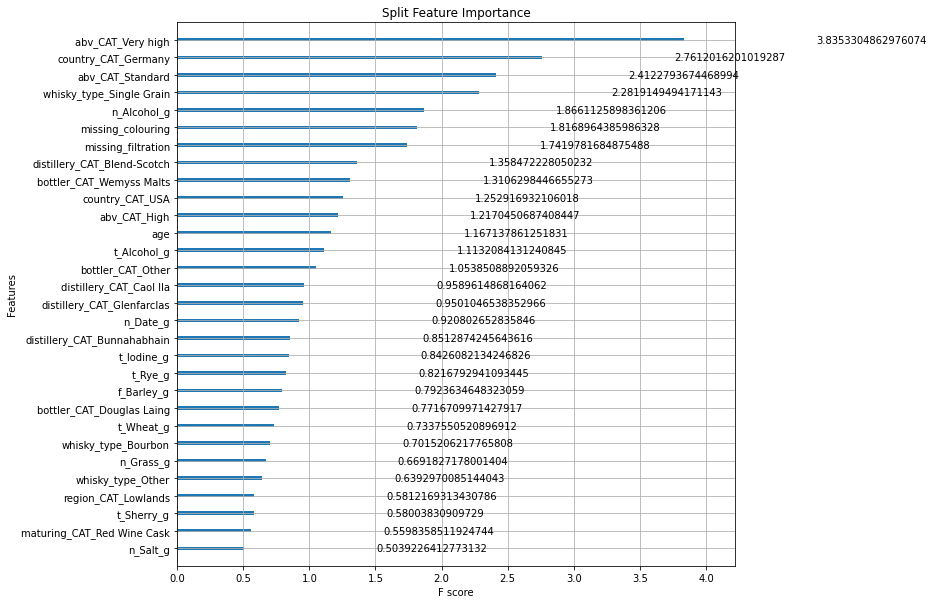

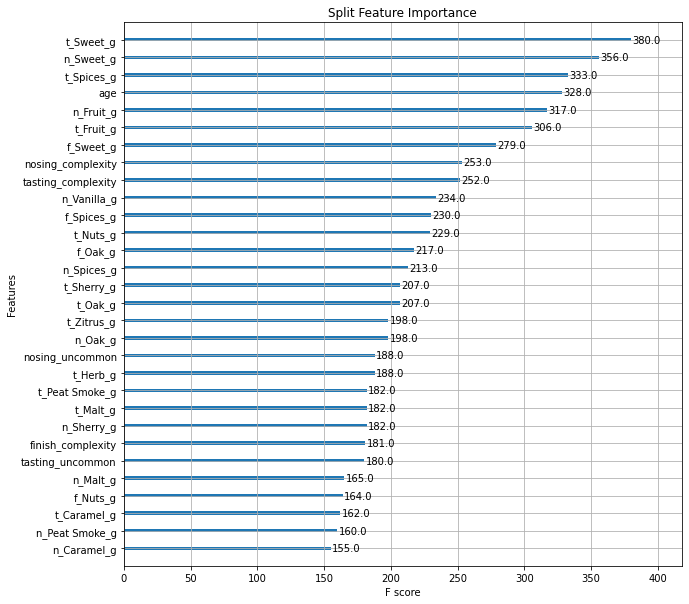

In [491]:
import xgboost as xgb

best_model_xgb = search_xgb.best_estimator_

X_transformed_xgb = pd.DataFrame(preprocessor.transform(X_train), columns = transformed_columns)

best_model_xgb = best_model_xgb['xgb'].fit(X_transformed_xgb, y_train)

fig, ax = plt.subplots(figsize=(10, 10))

xgb.plot_importance(best_model_xgb, max_num_features=30, importance_type='gain', ax=ax)
plt.title('Split Feature Importance')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))

xgb.plot_importance(best_model_xgb, max_num_features=30, importance_type='weight', ax=ax)
plt.title('Split Feature Importance')
plt.show()

In [492]:
best_model_xgb = search_xgb.best_estimator_

X_transformed_xgb = pd.DataFrame(preprocessor.transform(X_train), columns = transformed_columns)

best_model_xgb = best_model_xgb['xgb'].fit(X_transformed_xgb, y_train)

XGB_FI_Gain = pd.DataFrame.from_dict(best_model_xgb.get_booster().get_score(importance_type='gain'),orient='index',columns=['Gain FI'])
XGB_FI_Split = pd.DataFrame.from_dict(best_model_xgb.get_booster().get_score(importance_type='weight'),orient='index',columns=['Split FI'])


In [524]:
XGB_FI_Gain.sort_values(by='Gain FI', ascending=False).head(10)

,Gain FI
abv_CAT_Very high,3.835330
country_CAT_Germany,2.761202
abv_CAT_Standard,2.412279
whisky_type_Single Grain,2.281915
n_Alcohol_g,1.866113
missing_colouring,1.816896
missing_filtration,1.741978
distillery_CAT_Blend-Scotch,1.358472
bottler_CAT_Wemyss Malts,1.310630
country_CAT_USA,1.252917


In [526]:
XGB_FI_Split.sort_values(by='Split FI', ascending=False).head(10)

,Split FI
t_Sweet_g,380.0
n_Sweet_g,356.0
t_Spices_g,333.0
age,328.0
n_Fruit_g,317.0
t_Fruit_g,306.0
f_Sweet_g,279.0
nosing_complexity,253.0
tasting_complexity,252.0
n_Vanilla_g,234.0


In [ ]:
## HOW TO LOAD & APPLY THE PREPROCESSOR & MODEL
# from joblib import load

# # Load the preprocessing pipeline and the best XGBoost model from files
# preprocessing_TEST = load('preprocessing_pipeline.joblib')
# XGBOOST_model_TEST = load('XGBOOST_best_model.joblib')

# # Apply the pipeline
# new_data_preprocessed = preprocessing_TEST.transform(new_data)

# # Apply the model
# predictions = XGBOOST_model_TEST.predict(new_data_preprocessed)

## Light GBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30562
[LightGBM] [Info] Number of data points in the train set: 3453, number of used features: 311
[LightGBM] [Info] Start training from score 4.000261


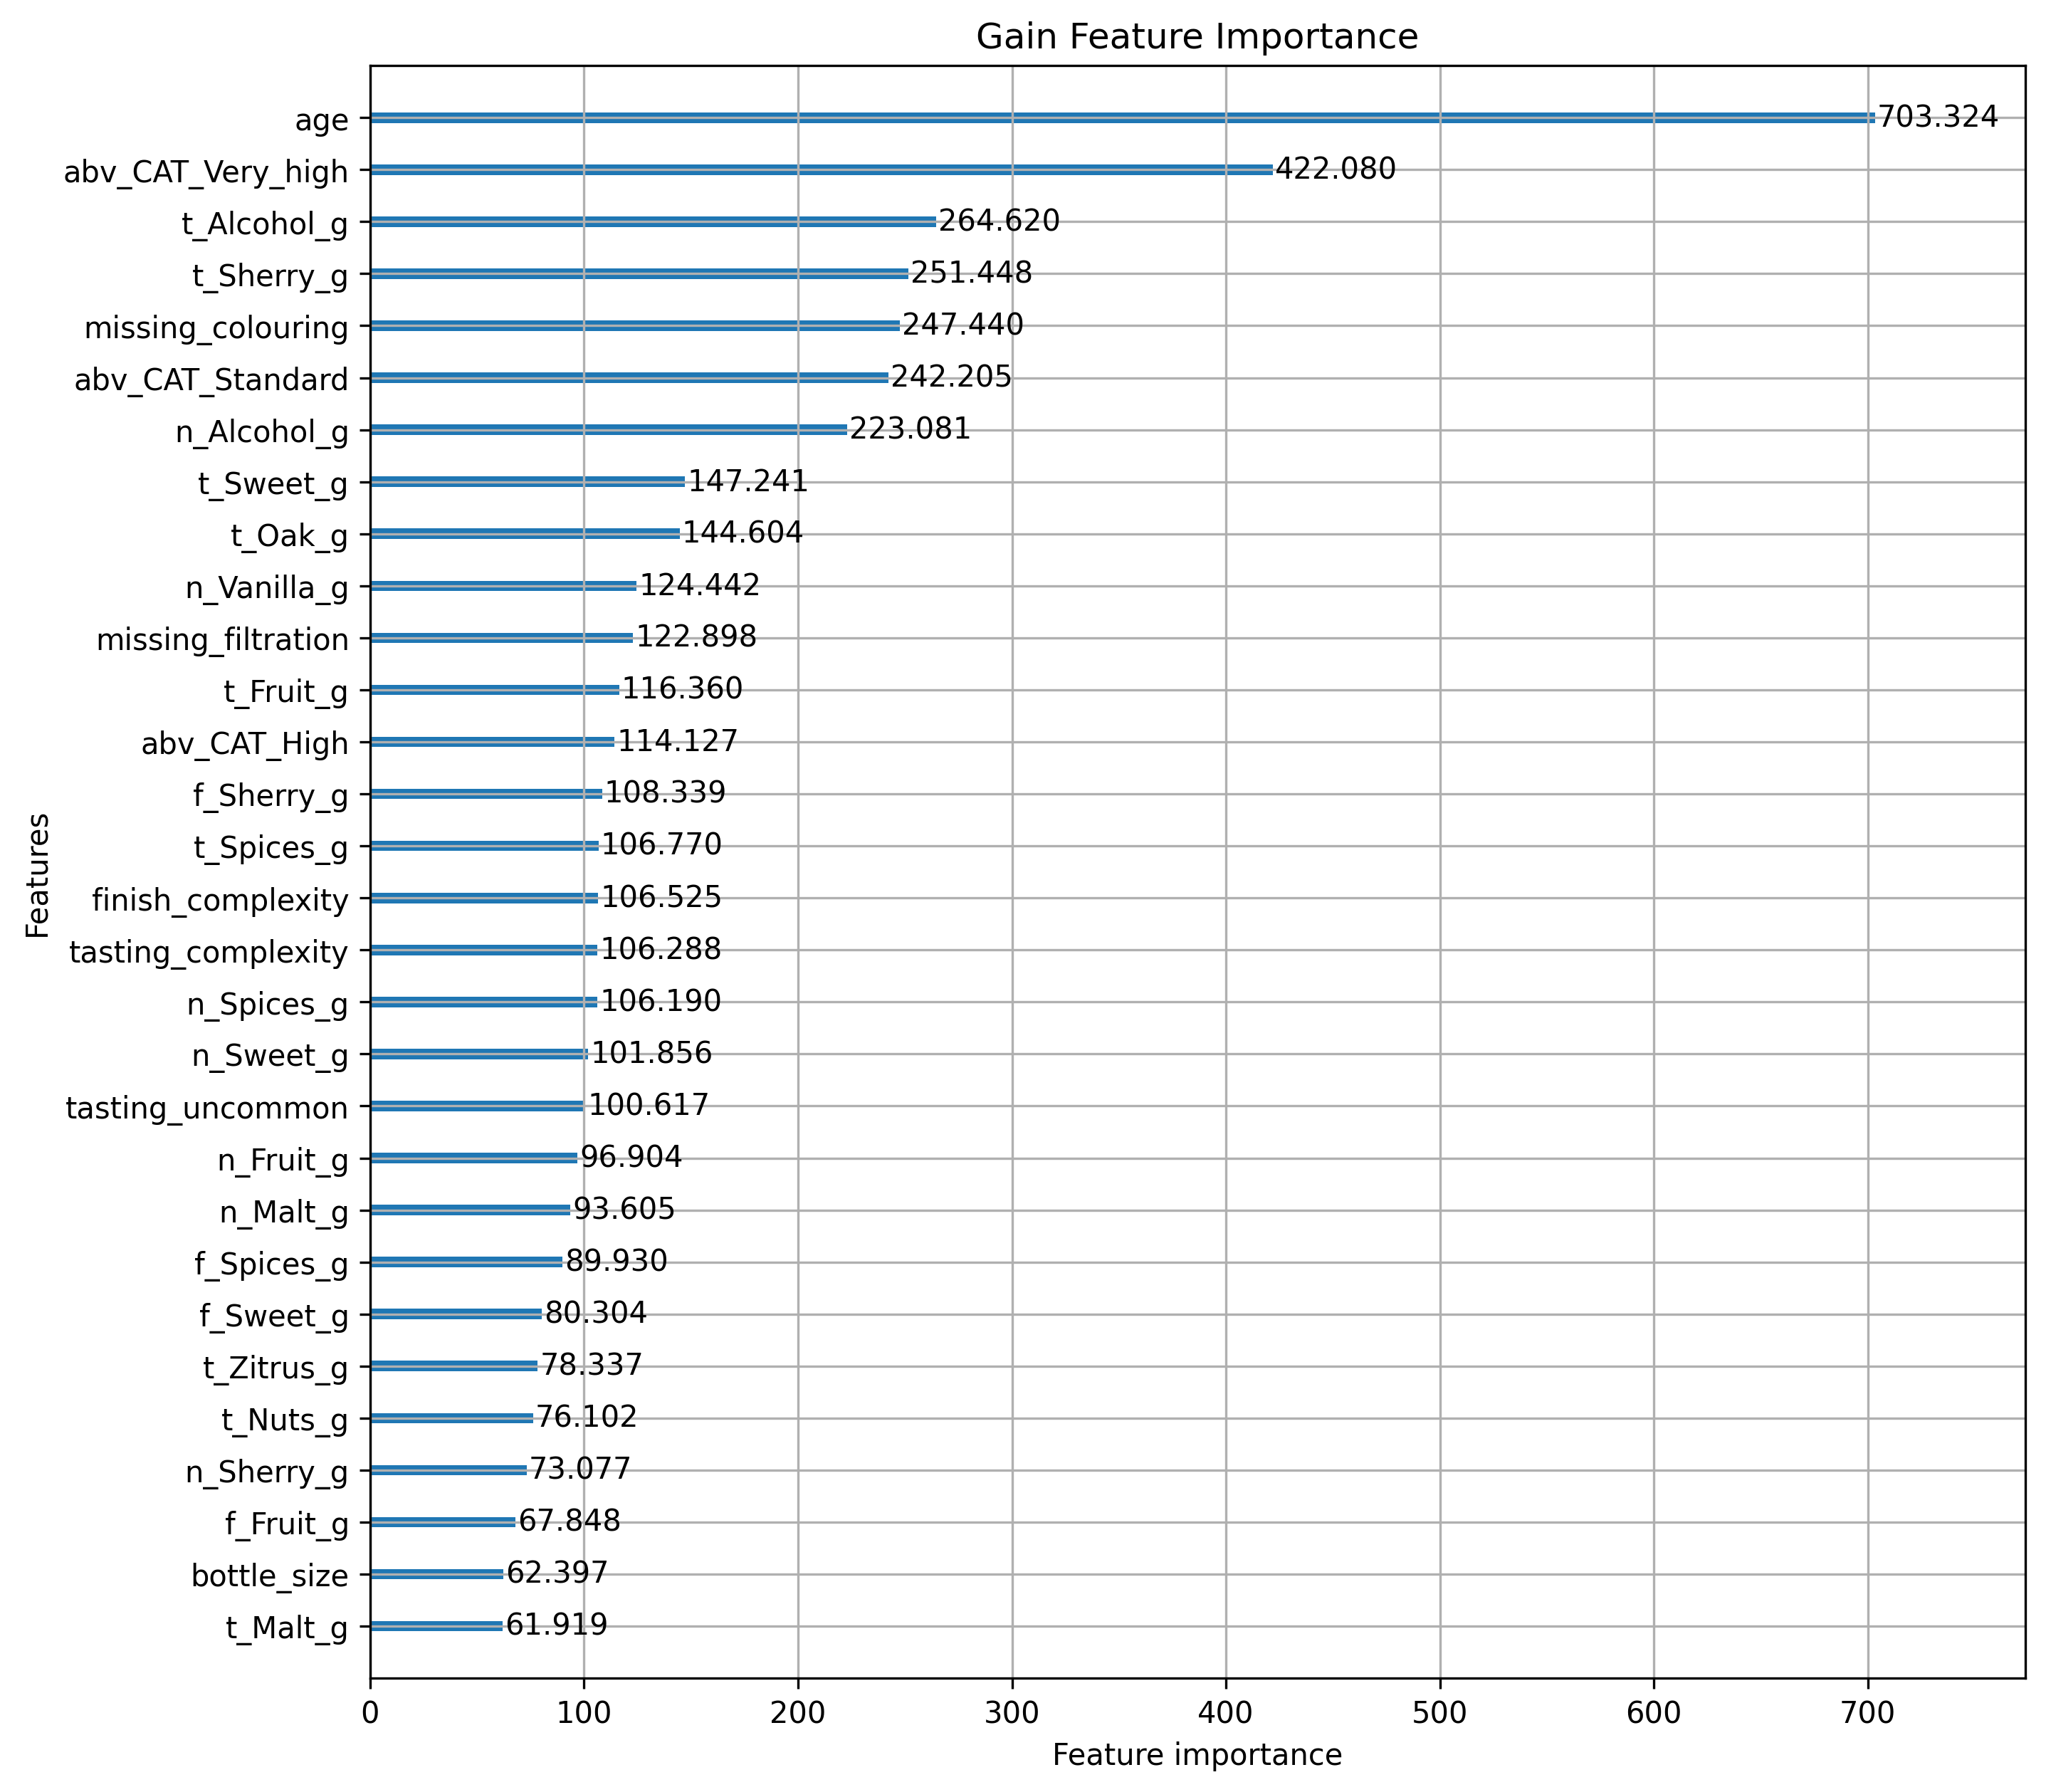

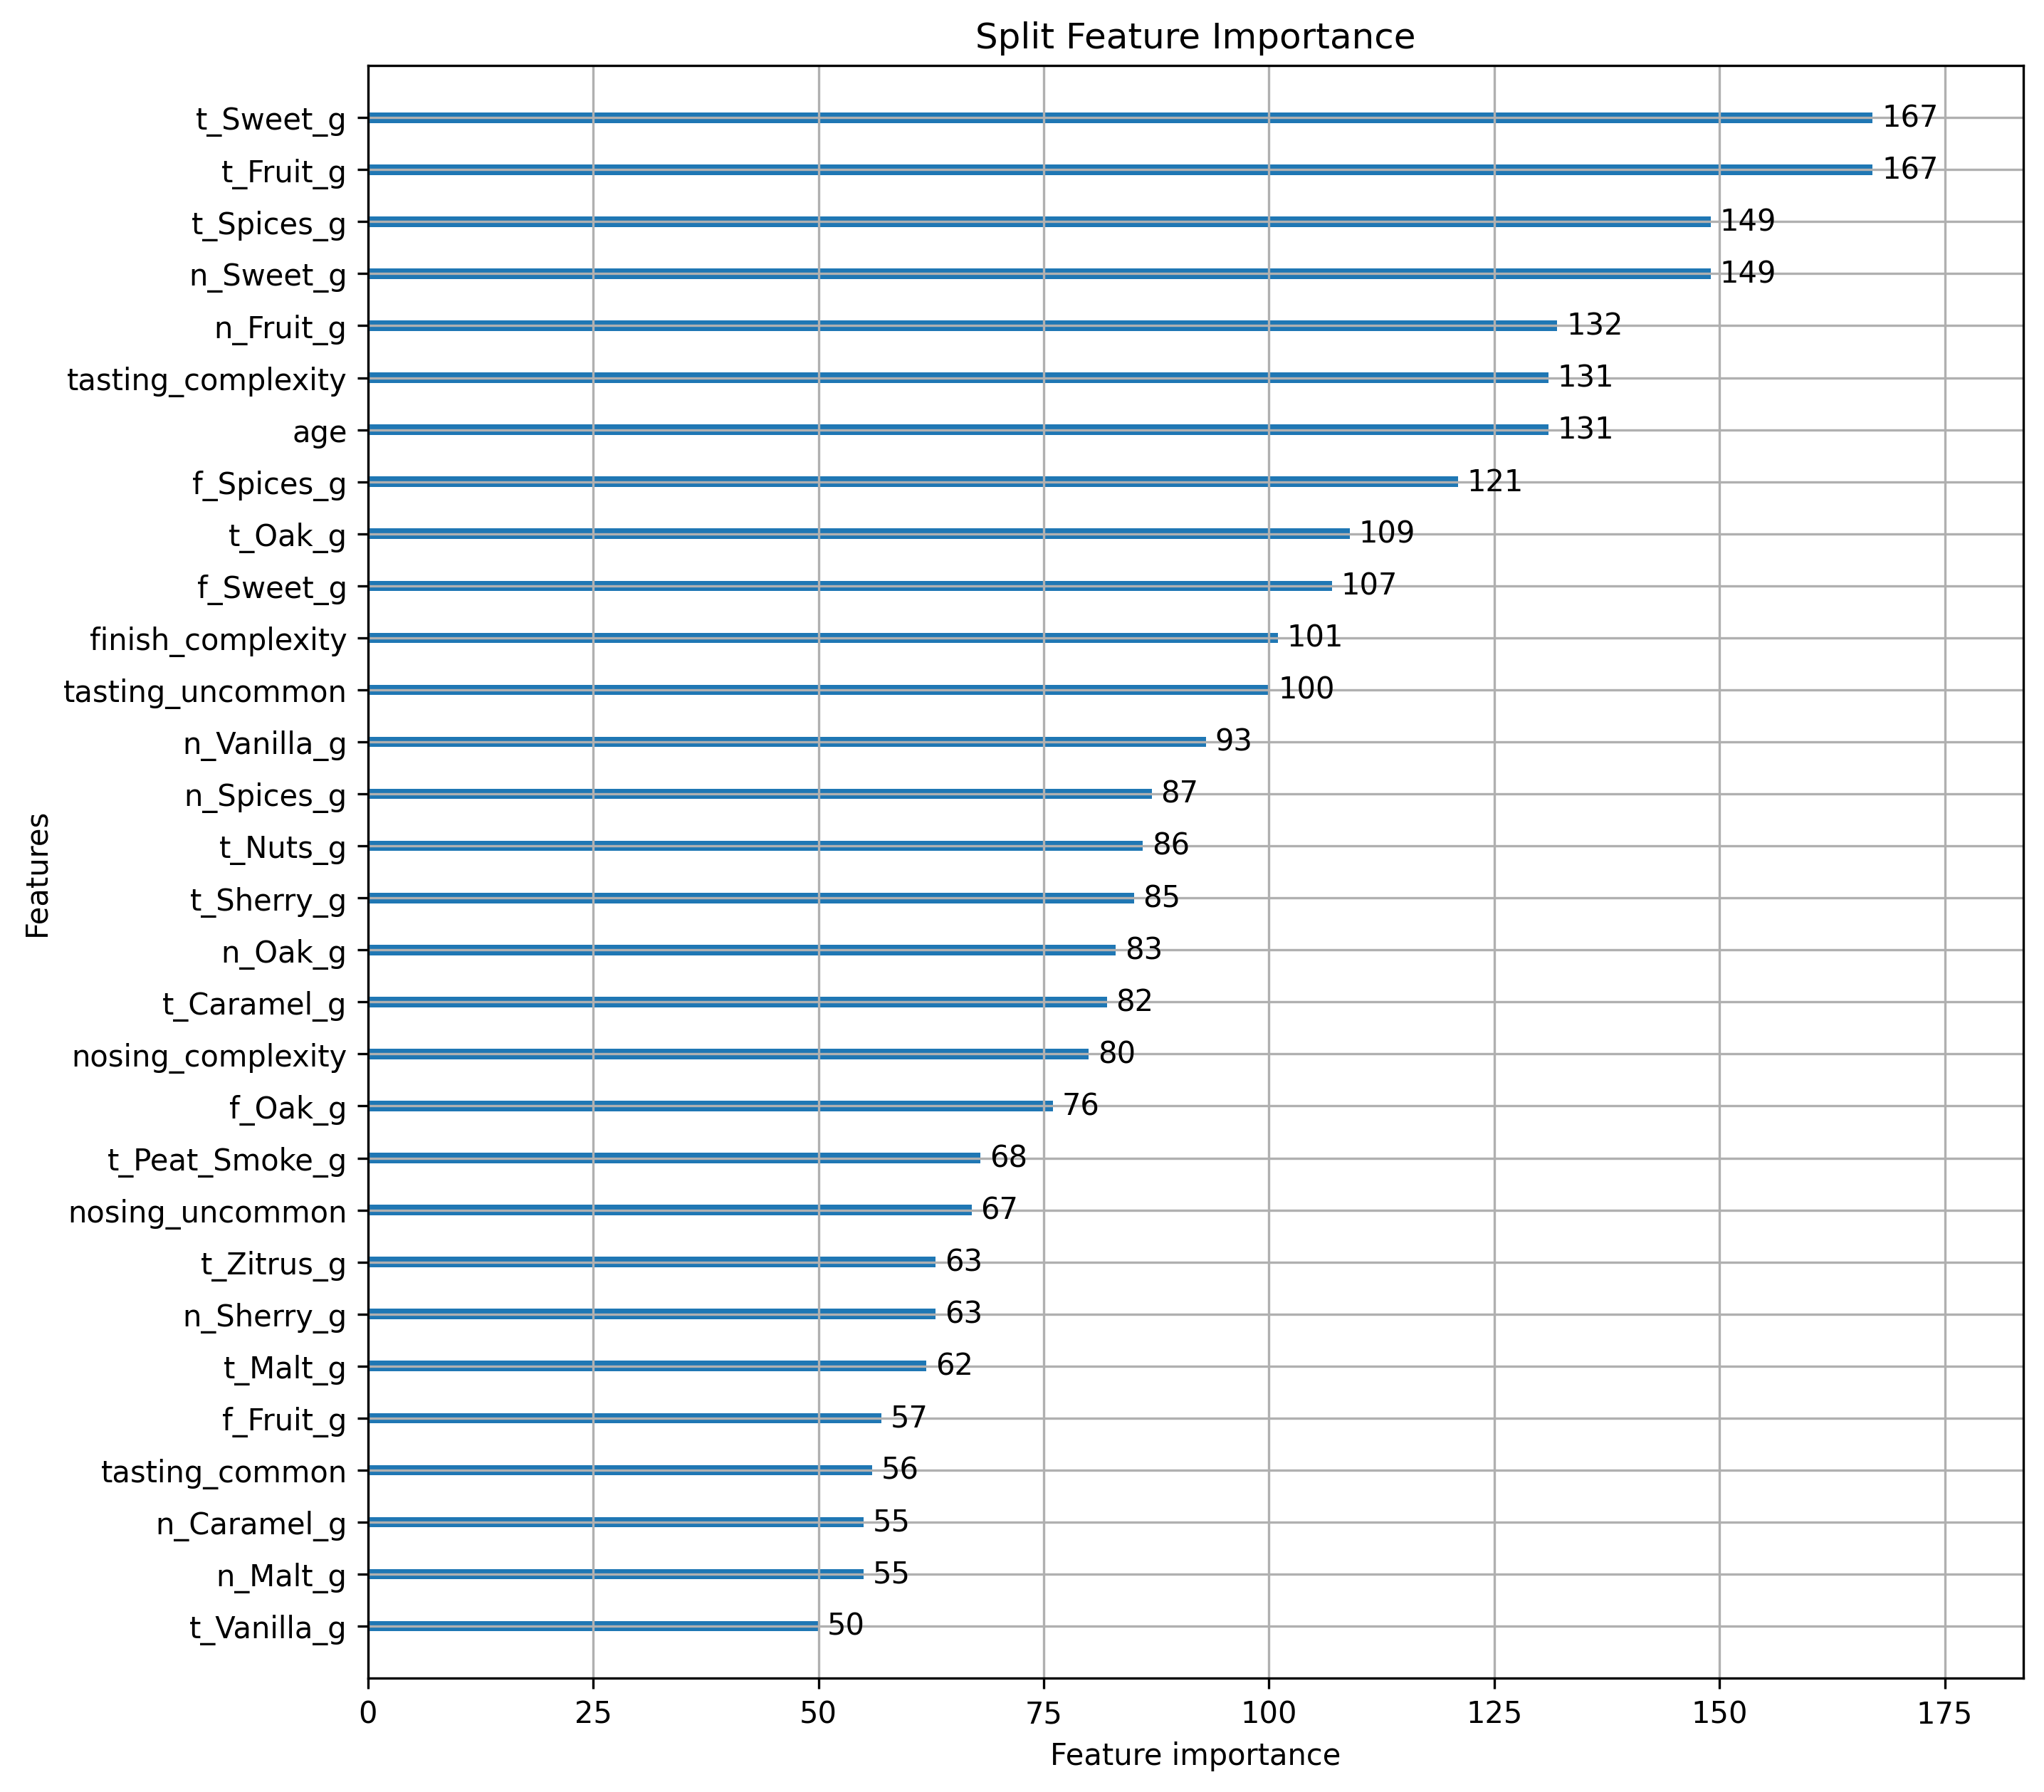

In [496]:
import lightgbm as lightgbm

best_model_lgbm = search_lgbm.best_estimator_

X_transformed_lgbm = pd.DataFrame(preprocessor.transform(X_train), columns = lgbm_transformed_columns)

best_model_lgbm = best_model_lgbm['lgbm'].fit(X_transformed_lgbm, y_train)

# Plot feature importance based on gain
lightgbm.plot_importance(
    best_model_lgbm, max_num_features=30, importance_type='gain', 
    title='Gain Feature Importance', dpi=300, figsize=(10, 10)
    )
plt.show()

# Plot feature importance based on split
lightgbm.plot_importance(
    best_model_lgbm, max_num_features=30, importance_type='split', 
    title='Split Feature Importance', dpi=300, figsize=(10, 10)
    )
plt.show()

In [497]:
best_model_lgbm = search_lgbm.best_estimator_

X_transformed_lgbm = pd.DataFrame(preprocessor.transform(X_train), columns = lgbm_transformed_columns)

best_model_lgbm = best_model_lgbm['lgbm'].fit(X_transformed_lgbm, y_train)

LGBM_FI_Gain = pd.DataFrame()
LGBM_FI_Gain['Feature'] = transformed_columns
LGBM_FI_Gain['Gain FI'] = best_model_lgbm.booster_.feature_importance(importance_type='gain')

LGBM_FI_Split = pd.DataFrame()
LGBM_FI_Split['Feature'] = transformed_columns
LGBM_FI_Split['Split FI'] = best_model_lgbm.booster_.feature_importance(importance_type='split')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30562
[LightGBM] [Info] Number of data points in the train set: 3453, number of used features: 311
[LightGBM] [Info] Start training from score 4.000261


In [530]:
LGBM_FI_Gain.sort_values(by='Gain FI', ascending=False).head(10)

,Feature,Gain FI
0,age,703.324347
258,abv_CAT_Very high,422.079822
97,t_Alcohol_g,264.620008
96,t_Sherry_g,251.447567
229,missing_colouring,247.439614
257,abv_CAT_Standard,242.205355
54,n_Alcohol_g,223.081065
80,t_Sweet_g,147.241428
88,t_Oak_g,144.603500
13,n_Vanilla_g,124.442141


In [531]:
LGBM_FI_Split.sort_values(by='Split FI', ascending=False).head(10)

,Feature,Split FI
80,t_Sweet_g,167
79,t_Fruit_g,167
5,n_Sweet_g,149
85,t_Spices_g,149
6,n_Fruit_g,132
0,age,131
4,tasting_complexity,131
153,f_Spices_g,121
88,t_Oak_g,109
154,f_Sweet_g,107


# SHAPLEY VALUES

In [500]:
import shap

## XG Boost

In [503]:
## XG BOOST
best_model_xgb = search_xgb.best_estimator_

X_transformed_xgb = pd.DataFrame(preprocessor.transform(X_train), columns = transformed_columns)

best_model_SHAP_xgb = best_model_xgb['xgb'].fit(X_transformed_xgb, y_train)

# calculate the Shap values
shap_values_xgb = shap.TreeExplainer(best_model_SHAP_xgb).shap_values(X_transformed_xgb)

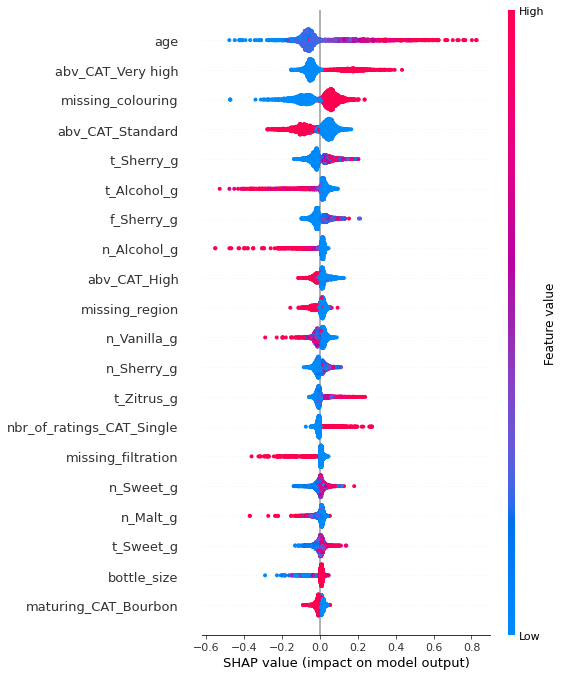

In [504]:
shap.summary_plot(shap_values_xgb, X_transformed_xgb)

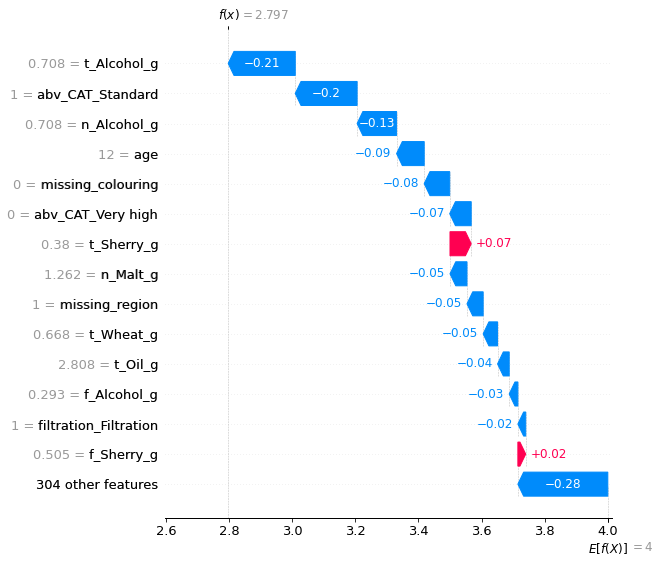

In [505]:
# Waterfall starts the background prior expectation for a whisky rating (E[f(x)])
# and then adds features one at a time until the model output is reached (f(x))

index = 3

explainer = shap.TreeExplainer(best_model_SHAP_xgb)

expl = shap.Explanation(shap_values_xgb[index], explainer.expected_value, X_transformed_xgb.iloc[index])

shap.plots.waterfall(expl, max_display=15)

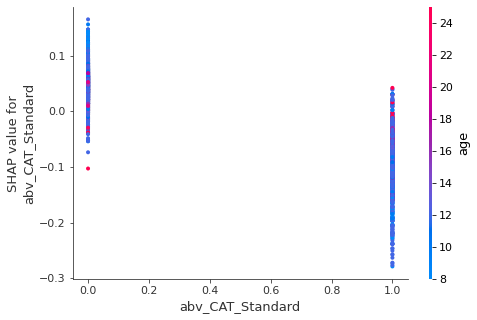

In [506]:
shap.dependence_plot("abv_CAT_Standard", shap_values_xgb, X_transformed_xgb, interaction_index="age")

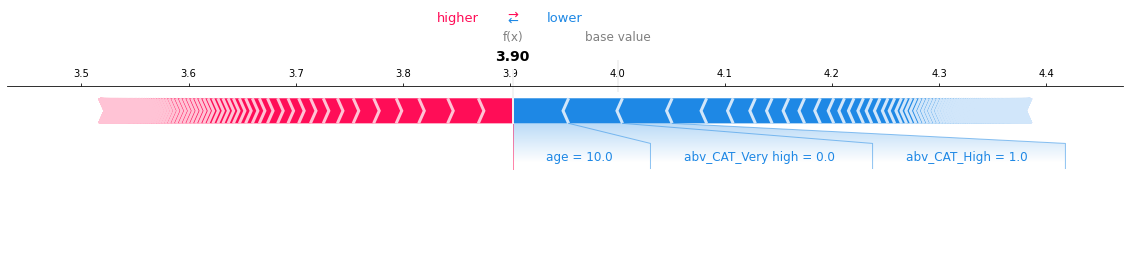

In [507]:
shap.plots.force(shap.TreeExplainer(best_model_SHAP_xgb).expected_value[0], shap_values_xgb[0], X_transformed_xgb.iloc[0, :], matplotlib = True)

## Light GBM

In [508]:
## LIGHT GBM
best_model_lgbm = search_lgbm.best_estimator_

X_transformed_lgbm = pd.DataFrame(preprocessor.transform(X_train), columns = lgbm_transformed_columns)

best_model_SHAP_lgbm = best_model_lgbm['lgbm'].fit(X_transformed_lgbm, y_train)

# calculate the Shap values
shap_values_lgbm = shap.TreeExplainer(best_model_SHAP_lgbm).shap_values(X_transformed_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30562
[LightGBM] [Info] Number of data points in the train set: 3453, number of used features: 311
[LightGBM] [Info] Start training from score 4.000261


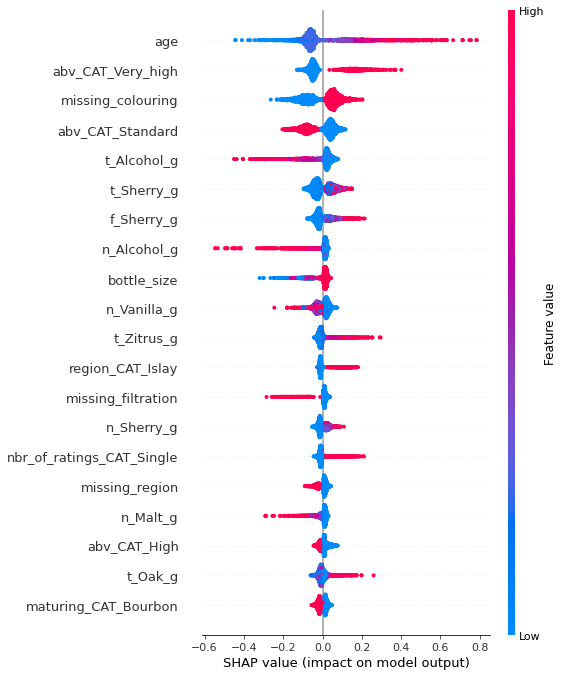

In [509]:
shap.summary_plot(shap_values_lgbm, X_transformed_lgbm)

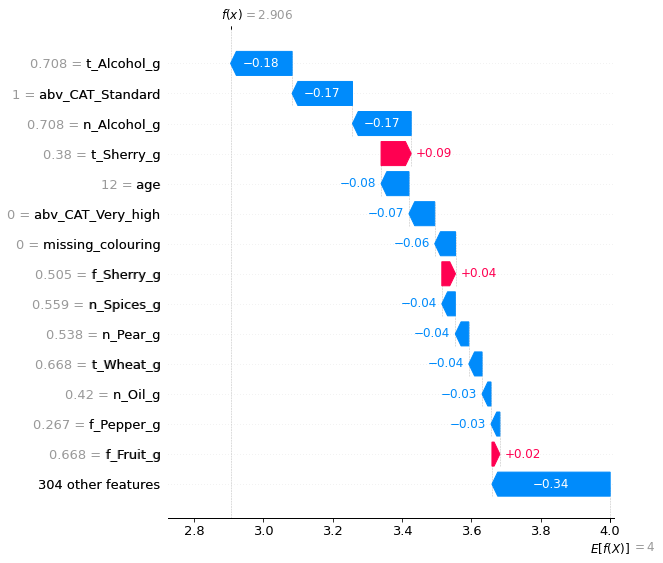

In [510]:
# Waterfall starts the background prior expectation for a whisky rating (E[f(x)])
# and then adds features one at a time until the model output is reached (f(x))

index = 3

explainer = shap.TreeExplainer(best_model_SHAP_lgbm)

expl = shap.Explanation(shap_values_lgbm[index], explainer.expected_value, X_transformed_lgbm.iloc[index])

shap.plots.waterfall(expl, max_display=15)

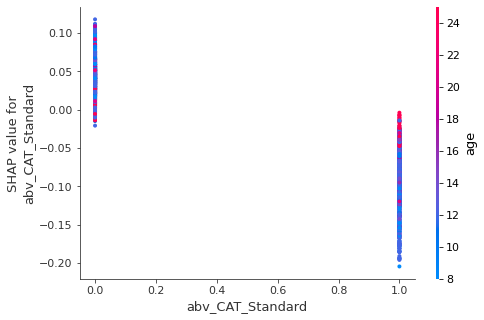

In [511]:
shap.dependence_plot("abv_CAT_Standard", shap_values_lgbm, X_transformed_lgbm, interaction_index="age")

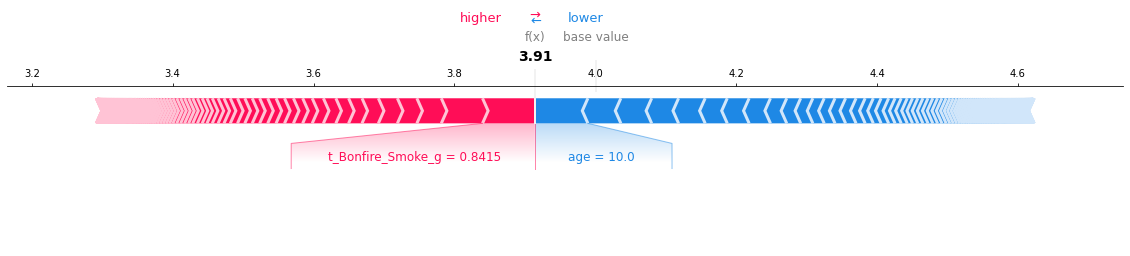

In [512]:
shap.plots.force(shap.TreeExplainer(best_model_SHAP_lgbm).expected_value[0], shap_values_lgbm[0], X_transformed_lgbm.iloc[0, :], matplotlib = True)

In [ ]:
# shap.decision_plot(shap.TreeExplainer(best_model_SHAP_lgbm).expected_value[0], shap_values_lgbm, X_transformed_lgbm.columns)

# TEST WITH NEW DATA

In [514]:
new_data = pd.read_excel('WHISKY_Whisky Rating Tool.xlsx', sheet_name='DATA_TRANSPOSED')

## XG Boost

In [515]:
import pandas as pd
from joblib import load

# Get the best model from grid search
best_model_xgb = search_xgb.best_estimator_

# Fit the best model on the entire training data

X_train_preproc = preprocessor.transform(X_train)
best_mod = best_model_xgb['xgb'].fit(X_train_preproc, y_train)

# Apply the pipeline
new_data_preprocessed = pd.DataFrame(preprocessor.transform(new_data), columns = transformed_columns)

# Apply the model
predictions = best_model_xgb['xgb'].predict(new_data_preprocessed)
print(f"The model predicts a Whisky Rating of: ", round(predictions[0],3))

The model predicts a Whisky Rating of:  3.727


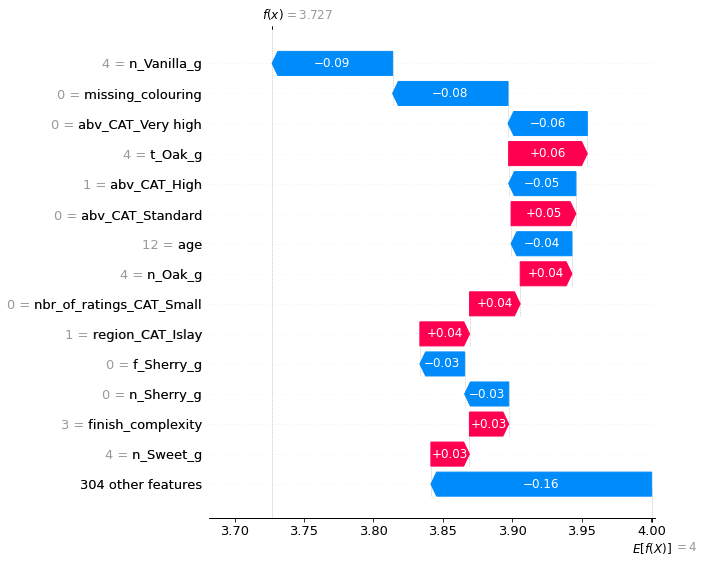

In [516]:
shap_values_new_data = shap.TreeExplainer(best_mod).shap_values(new_data_preprocessed)
explainer = shap.TreeExplainer(best_mod)

expl = shap.Explanation(shap_values_new_data[0], explainer.expected_value, new_data_preprocessed.iloc[0])

shap.plots.waterfall(expl, max_display=15)

## Light GBM

In [517]:
import pandas as pd
from joblib import load

# Get the best model from grid search
best_model_lgbm = search_lgbm.best_estimator_

# Fit the best model on the entire training data

X_train_preproc = preprocessor.transform(X_train)
best_mod = best_model_lgbm['lgbm'].fit(X_train_preproc, y_train)

# Apply the pipeline
new_data_preprocessed = pd.DataFrame(preprocessor.transform(new_data), columns = transformed_columns)

# Apply the model
predictions = best_model_lgbm['lgbm'].predict(new_data_preprocessed)
print(f"The model predicts a Whisky Rating of: ", round(predictions[0],3))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30562
[LightGBM] [Info] Number of data points in the train set: 3453, number of used features: 311
[LightGBM] [Info] Start training from score 4.000261
The model predicts a Whisky Rating of:  3.459


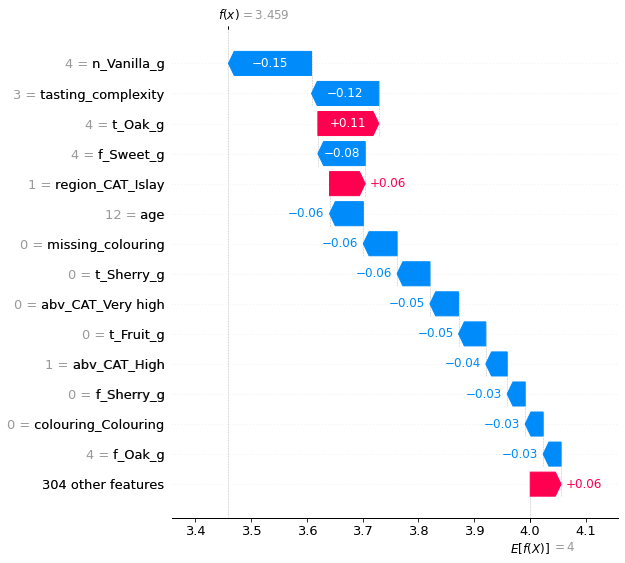

In [518]:
shap_values_new_data = shap.TreeExplainer(best_mod).shap_values(new_data_preprocessed)
explainer = shap.TreeExplainer(best_mod)

expl = shap.Explanation(shap_values_new_data[0], explainer.expected_value, new_data_preprocessed.iloc[0])

shap.plots.waterfall(expl, max_display=15)